<a href="https://colab.research.google.com/github/Jinendra-Gambhir/DoorDash-Analytics/blob/main/Final_Doordash_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_path = '/content/doordash.csv'

# Importing necessaries libraries for processing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install pyspark py4j

from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("doordash") \
    .getOrCreate()

In [ ]:
df = pd.read_csv(data_path)
df.head()

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,...,address,cuisines,delivery_time_raw,delivery_time,review_count,review_rating,RunDate,Specialty Items,Meal Types,Dietary Preferences
0,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.675464,-73.980782,1.594482,...,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese,24 - 34,29,1364,4.8,25/04/22 7:01,Vietnamese|Miscellaneous|Sandwiches,Miscellaneous,Miscellaneous
1,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,...,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese,24 - 34,29,1364,4.8,25/04/22 7:01,Vietnamese|Miscellaneous|Sandwiches,Miscellaneous,Miscellaneous
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,...,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese,24 - 34,29,1364,4.8,25/04/22 7:01,Vietnamese|Miscellaneous|Sandwiches,Miscellaneous,Miscellaneous
3,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.672978,-73.950462,0.404577,...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican,23 - 33,28,2000,4.6,25/04/22 7:01,Miscellaneous|Tacos,Brunch|Miscellaneous,Miscellaneous
4,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.672978,-73.950462,0.404577,...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican,23 - 33,28,2000,4.6,25/04/22 7:01,Miscellaneous|Tacos,Brunch|Miscellaneous,Miscellaneous


In [ ]:
df.shape

(11181, 22)

In [ ]:
print("Columns = ")
df.columns

Columns = 


Index(['searched_zipcode', 'searched_lat', 'searched_lng', 'searched_address',
       'searched_state', 'searched_city', 'searched_metro', 'latitude',
       'longitude', 'distance', 'loc_name', 'loc_number', 'address',
       'cuisines', 'delivery_time_raw', 'delivery_time', 'review_count',
       'review_rating', 'RunDate', 'Specialty Items', 'Meal Types',
       'Dietary Preferences'],
      dtype='object')

In [ ]:
print("Information about all columns = ")
df.info()

Information about all columns = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11181 entries, 0 to 11180
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   searched_zipcode     11181 non-null  int64  
 1   searched_lat         11181 non-null  float64
 2   searched_lng         11181 non-null  float64
 3   searched_address     11181 non-null  object 
 4   searched_state       11181 non-null  object 
 5   searched_city        11181 non-null  object 
 6   searched_metro       11181 non-null  object 
 7   latitude             11181 non-null  float64
 8   longitude            11181 non-null  float64
 9   distance             11181 non-null  float64
 10  loc_name             11181 non-null  object 
 11  loc_number           11181 non-null  int64  
 12  address              11181 non-null  object 
 13  cuisines             11181 non-null  object 
 14  delivery_time_raw    11181 non-null  object 
 15  del

In [ ]:
#Find out statistics of all numerical columns
df.describe()

,searched_zipcode,searched_lat,searched_lng,latitude,longitude,distance,loc_number,delivery_time,review_count,review_rating
count,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,11181.000000,1.118100e+04,11181.000000,11181.000000,11181.000000
mean,35083.304982,39.936612,-84.941963,39.718188,-85.906690,1.279212,2.496465e+06,35.939719,388.857168,3.928638
std,34516.468544,2.989567,17.302510,3.147741,18.156185,0.491993,5.480222e+06,10.264504,606.220984,1.533842
min,2118.000000,33.683250,-118.398784,33.801625,-118.418331,0.016826,1.183000e+03,10.000000,0.000000,0.000000
25%,10003.000000,40.631075,-87.786171,40.666018,-87.779037,0.935591,3.133410e+05,29.000000,8.000000,4.100000
50%,11219.000000,40.732473,-74.021199,40.694335,-74.015346,1.389223,1.041932e+06,35.000000,84.000000,4.500000
75%,60640.000000,41.947969,-73.950677,41.958135,-73.939540,1.687541,1.776000e+06,42.000000,465.000000,4.700000
max,92804.000000,42.457335,-70.996287,42.482832,-70.980546,1.999912,2.320363e+07,101.000000,2000.000000,5.000000


In [ ]:
#Find out whether dataset has any null values
df.isna().sum()

searched_zipcode       0
searched_lat           0
searched_lng           0
searched_address       0
searched_state         0
searched_city          0
searched_metro         0
latitude               0
longitude              0
distance               0
loc_name               0
loc_number             0
address                0
cuisines               0
delivery_time_raw      0
delivery_time          0
review_count           0
review_rating          0
RunDate                0
Specialty Items        0
Meal Types             0
Dietary Preferences    0
dtype: int64

# **Using Pyspark:**

# Popular Cuisines By City

In [ ]:
from pyspark.sql.functions import explode, desc, split, col, max, mean, avg, format_number, rank, count
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

df = spark.read.csv(data_path, header=True, inferSchema=True)
# Selecting relevant columns
df = df.select("searched_city", "cuisines", "review_rating", "searched_state")

# Explode the cuisines column to create a row for each cuisine
df = df.withColumn("cuisine", explode(split(col("cuisines"), "\\|")))

# Filter out cuisines labeled as "Miscellaneous"
df = df.filter(col("cuisine") != "Miscellaneous")

# Group by city and cuisine, and count the occurrences of each cuisine
cuisine_counts = df.groupBy("searched_city", "cuisine").count()

# Find the most popular cuisines in each city
window_spec = Window.partitionBy("searched_city").orderBy(col("count").desc())

popular_cuisines = cuisine_counts.withColumn("rn", row_number().over(window_spec)) \
    .filter(col("rn") == 1) \
    .select("searched_city", "cuisine", "count") \
    .orderBy(desc("count"))


# Calculate the average review rating for each cuisine
average_ratings = df.groupBy("cuisine").agg(format_number(avg("review_rating"), 2).alias("average_rating"))

# Sort the data by average rating in descending order
top_rated_cuisines = average_ratings.orderBy(col("average_rating").desc())



# Show the results
popular_cuisines.show()

# Show the top rated cuisines; adjust the number of cuisines you want to display
top_rated_cuisines.show(20)
popular_cuisines.to_pandas_on_spark().to_csv('popular_cuisines.csv', index=False)

+---------------+--------+-----+
|  searched_city| cuisine|count|
+---------------+--------+-----+
|       Brooklyn|American|  547|
|        Chicago|American|  413|
|       New York|American|  277|
|         Boston|American|  160|
|    Los Angeles| Mexican|  117|
|      Cambridge| Italian|   86|
|    Charlestown| Italian|   85|
|    Jersey City|American|   84|
|  Staten Island|American|   84|
|      Weehawken|American|   83|
|        Burbank| Mexican|   75|
|       Glendale| Mexican|   74|
|     Park Ridge|American|   57|
|       Glenview|American|   56|
|Manhattan Beach|American|   49|
|       Torrance|American|   47|
|     Dorchester|American|   43|
|        Anaheim| Mexican|   35|
|         Irvine| Mexican|   35|
|    West Covina| Mexican|   35|
+---------------+--------+-----+
only showing top 20 rows

+--------------+--------------+
|       cuisine|average_rating|
+--------------+--------------+
|      Peruvian|          4.70|
|       Russian|          4.70|
|        German|      

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:5723: FutureWarning: DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


# Top-rated Cuisines by City

In [ ]:
# Calculate the average review rating for each combination of city and cuisine
average_ratings = df.groupBy("searched_city", "cuisine").agg(
    avg("review_rating").alias("average_rating")
)

# Define a window specification: partition by city and order by average rating descending
windowSpec = Window.partitionBy("searched_city").orderBy(col("average_rating").desc())

# Use row_number to get the top cuisine per city
top_rated_cuisines_by_city = average_ratings.withColumn("rank", row_number().over(windowSpec)) \
    .filter(col("rank") == 1) \
    .select("searched_city", "cuisine", format_number("average_rating", 2).alias("average_rating"))

# Show the top rated cuisines by city
top_rated_cuisines_by_city.show()
top_rated_cuisines_by_city.to_pandas_on_spark().to_csv('top_rated_cuisines_by_city.csv', index=False)

+---------------+----------+--------------+
|  searched_city|   cuisine|average_rating|
+---------------+----------+--------------+
|        Anaheim|     Greek|          4.90|
|        Astoria|   Italian|          4.42|
|        Belmont|   Turkish|          4.70|
|         Boston|  Peruvian|          4.77|
|       Brooklyn|    Korean|          4.58|
|        Burbank|    French|          4.80|
|      Cambridge|  Peruvian|          4.77|
|    Charlestown|  Peruvian|          4.77|
|        Chicago|   Turkish|          5.00|
|     Dorchester|    French|          4.90|
|       Glendale|    German|          4.80|
|       Glenview|   Turkish|          5.00|
|         Irvine|     Greek|          4.90|
|    Jersey City|Vietnamese|          5.00|
|      La Grange|   Chinese|          4.23|
|    Los Angeles|    German|          4.80|
|Manhattan Beach|  Peruvian|          4.85|
|        Melrose|   Seafood|          4.87|
|       New York|    Korean|          4.58|
|     Park Ridge|    French|    

# Most popular cuisines by state and top rated cuisines across the state


In [ ]:
# Group by state and cuisine and count occurrences
cuisine_counts = df.groupBy("searched_state", "cuisine").agg(
    count("cuisine").alias("cuisine_count")
)

# Define a window specification for each state ordered by count descending
windowSpecCount = Window.partitionBy("searched_state").orderBy(col("cuisine_count").desc())

# Apply the window specification to find the most popular cuisine in each state
most_popular_cuisine_by_state = cuisine_counts.withColumn("rank", row_number().over(windowSpecCount)) \
    .filter(col("rank") == 1) \
    .select("searched_state", "cuisine", "cuisine_count")

# Show the results
most_popular_cuisine_by_state.show()
most_popular_cuisine_by_state.to_pandas_on_spark().to_csv('most_popular_cuisine_by_state.csv', index=False)
# Calculate the average review rating for each combination of state and cuisine
average_ratings_state = df.withColumn("review_rating", df["review_rating"]) \
    .groupBy("searched_state", "cuisine").agg(
        avg("review_rating").alias("average_rating")
    )

# Define a window specification: partition by state and order by average rating descending
windowSpecRating = Window.partitionBy("searched_state").orderBy(col("average_rating").desc())

# Apply the window specification with row_number to get the top-rated cuisine per state
top_rated_cuisines_by_state = average_ratings_state.withColumn("rank", row_number().over(windowSpecRating)) \
    .filter(col("rank") == 1) \
    .select("searched_state", "cuisine", format_number("average_rating", 2).alias("average_rating"))

# Show the top rated cuisines by state
top_rated_cuisines_by_state.show(20)
top_rated_cuisines_by_state.to_pandas_on_spark().to_csv('top_rated_cuisines_by_state.csv', index=False)

+--------------+--------+-------------+
|searched_state| cuisine|cuisine_count|
+--------------+--------+-------------+
|            CA| Mexican|          448|
|            IL|American|          555|
|            MA| Italian|          389|
|            NJ|American|          167|
|            NY|American|          932|
+--------------+--------+-------------+



/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:5723: FutureWarning: DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+--------------+----------+--------------+
|searched_state|   cuisine|average_rating|
+--------------+----------+--------------+
|            CA|    German|          4.80|
|            IL|   Turkish|          5.00|
|            MA|  Peruvian|          4.77|
|            NJ|Vietnamese|          5.00|
|            NY|  Peruvian|          4.80|
+--------------+----------+--------------+




# Impact of Delivery Time on Reviews.

In [ ]:
'''impact of Delivery Time on Reviews: Investigate if there's any correlation between delivery time and review ratings.
Do customers tend to give lower ratings for longer delivery times? This could help DoorDash optimize delivery routes or
prioritize certain areas.'''
# delivery_time = df['delivery_time']
# ratings = df['review_rating']
# delivery_time.corr(ratings)
from pyspark.sql.functions import col, corr

df = spark.read.csv(data_path, header=True, inferSchema=True)

# Selecting relevant columns
df = df.select("delivery_time", 'review_rating')

# Convert 'delivery_time' column to a numerical data type
df = df.withColumn('delivery_time_numeric', df['delivery_time'].cast('float'))
df = df.withColumn('review_rating_numeric', df['review_rating'].cast('float'))
# Select the 'delivery_time_numeric' and 'review_rating' columns
delivery_time_ratings = df.select('delivery_time_numeric', 'review_rating_numeric')

# Compute the correlation between 'delivery_time_numeric' and 'review_rating'
correlation = delivery_time_ratings.stat.corr('delivery_time_numeric', 'review_rating_numeric')

# Display the correlation
print("Correlation between delivery_time and review_rating:", correlation)

Correlation between delivery_time and review_rating: 0.03482272749456101




```
# This is formatted as code
```

**Since the correlation between delivery_time and ratings is close to 0 that indicates that there is no relation between delivery_time and ratings. **

# Relation between distance and delivery time

In [ ]:
# #Distance vs. Delivery Time
# distance = df['distance']
# delivery_time = df['delivery_time']
from pyspark.sql.functions import col, corr

df = spark.read.csv(data_path, header=True, inferSchema=True)

# Selecting relevant columns
df = df.select('delivery_time', 'distance')

distance_delivery_time = df.select(format_number('distance', 2), 'delivery_time')

# Display the first few rows of the DataFrame
distance_delivery_time.show()

+--------------------------+-------------+
|format_number(distance, 2)|delivery_time|
+--------------------------+-------------+
|                      1.59|           29|
|                      1.59|           29|
|                      1.59|           29|
|                      0.40|           28|
|                      0.40|           28|
|                      0.40|           28|
|                      0.30|           25|
|                      0.30|           25|
|                      0.30|           25|
|                      1.39|           42|
|                      1.39|           42|
|                      1.39|           42|
|                      1.72|           34|
|                      1.72|           34|
|                      1.72|           34|
|                      1.61|           30|
|                      1.61|           30|
|                      1.61|           30|
|                      1.69|           33|
|                      1.69|           33|
+----------

In [ ]:
# distance.corr(delivery_time)
correlation = df.select(corr('distance', 'delivery_time')).first()[0]

# Display the correlation
print("Correlation between distance and delivery_time:", correlation)

Correlation between distance and delivery_time: 0.42427323610438594


Since Correlation is positive and close to 1,
**.**
**.**


* Increasing distance correlates positively with longer delivery times, suggesting that farther distances result in extended delivery durations.
* This correlation implies that DoorDash may optimize delivery routes or allocate additional resources for timely deliveries in distant locations.



# Examine whether there's a relationship between the number of reviews a restaurant has and its average review rating.

In [ ]:
#Review Count vs. Review Ratings
# ratings = df['review_rating']
df = spark.read.csv(data_path, header=True, inferSchema=True)


# Selecting relevant columns
df = df.select('review_rating', 'review_count')


# Compute the correlation between 'review_count' and 'review_rating'
correlation = df.select(corr('review_count', 'review_rating')).first()[0]



# Select the 'review_count' column
review_count = df.select('review_count')

# Display the first few rows of the 'review_count' column
review_count.show()


# Display the correlation
print("Correlation between review_count and review_rating:", correlation)

+------------+
|review_count|
+------------+
|        1364|
|        1364|
|        1364|
|        2000|
|        2000|
|        2000|
|         163|
|         163|
|         163|
|        2000|
|        2000|
|        2000|
|        2000|
|        2000|
|        2000|
|        2000|
|        2000|
|        2000|
|         263|
|         263|
+------------+
only showing top 20 rows

Correlation between review_count and review_rating: 0.2712471271181124


**Changes in one column may be somewhat associated with changes in the other column, but the relationship is not strong.**

# City Comparison
Compare key metrics such as average review rating, delivery time, or popular cuisines across different cities.

In [ ]:
#Top 10 cities with good reviews
# review_by_city = df.groupby('searched_city')['review_rating'].mean().sort_values(ascending=False)
# review_by_city.head(10)
from pyspark.sql.functions import mean

df = spark.read.csv(data_path, header=True, inferSchema=True)

# Selecting relevant columns
df = df.select('searched_city', 'review_rating')

# Group by 'searched_city' and calculate the mean review rating for each city
review_by_city = df.groupBy('searched_city').agg(mean('review_rating').alias('mean_review_rating'))

# Format the 'mean_review_rating' column to two decimal places
review_by_city = review_by_city.withColumn('mean_review_rating', format_number('mean_review_rating', 2))

# Sort the result in descending order based on the mean review rating
top_cities = review_by_city.orderBy('mean_review_rating', ascending=False)

# Select the top 10 cities with the highest mean review rating
top_10_cities = top_cities.limit(10)

# Display the top 10 cities with the highest mean review rating
top_10_cities.show()

+---------------+------------------+
|  searched_city|mean_review_rating|
+---------------+------------------+
|        Melrose|              4.49|
|         Revere|              4.49|
|        Belmont|              4.48|
|     Dorchester|              4.37|
|    West Covina|              4.32|
|         Irvine|              4.27|
|Manhattan Beach|              4.26|
|       Torrance|              4.25|
|        Anaheim|              4.24|
|         Boston|              4.23|
+---------------+------------------+



In [ ]:
#Top 10 cities with less avg delivery time
# delivery_time_by_city = df.groupby('searched_city')['delivery_time'].mean().sort_values()
# delivery_time_by_city.head(10)
df = spark.read.csv(data_path, header=True, inferSchema=True)

df = df.select('searched_city', 'delivery_time')

# Group by 'searched_city' and calculate the mean delivery time for each city
avg_delivery_time_by_city = df.groupBy('searched_city').agg(format_number(mean('delivery_time'), 2).alias('avg_delivery_time'))


# Sort the result in ascending order based on the mean delivery time
top_cities_low_delivery_time = avg_delivery_time_by_city.orderBy('avg_delivery_time')

# Select the top 10 cities with the lowest average delivery time
top_10_cities_low_delivery_time = top_cities_low_delivery_time.limit(10)

# Display the top 10 cities with the lowest average delivery time
top_10_cities_low_delivery_time.show()

+---------------+-----------------+
|  searched_city|avg_delivery_time|
+---------------+-----------------+
|         Revere|            25.62|
|        Belmont|            25.64|
|        Astoria|            27.89|
|        Melrose|            27.90|
|    Los Angeles|            31.11|
|       Brooklyn|            31.60|
|       New York|            31.60|
|Manhattan Beach|            32.33|
|       Torrance|            32.40|
|         Irvine|            32.44|
+---------------+-----------------+



# Top three rated cuisines by city

In [ ]:
from pyspark.sql.functions import col, split, explode, mean, round
from pyspark.sql.window import Window
import pyspark.sql.functions as F
#cities and their popular cuisines
# cities_and_cuisines = pd.DataFrame(df.groupby(['searched_city','cuisines'])['review_rating'].mean().sort_values(ascending=False))
# cities_and_cuisines.head(10)
df = spark.read.csv(data_path, header=True, inferSchema=True)

df = df.withColumn("cuisine", explode(split(col("cuisines"), "\\|")))

# Select relevant columns
df = df.select('searched_city', 'review_rating', 'cuisine')

# Group by 'searched_city' and 'cuisine', and calculate the mean review rating for each combination
cities_and_cuisines = df.groupBy(['searched_city', 'cuisine']).agg(mean('review_rating').alias('avg_review_rating'))

# Create a window specification to partition by 'searched_city' and order by 'avg_review_rating' in descending order
window_spec = Window.partitionBy("searched_city").orderBy(col("avg_review_rating").desc())

# Add a row number column to each partition
ranked_cuisines = cities_and_cuisines.withColumn("rank", F.row_number().over(window_spec))

# Filter to keep only the top 5 cuisines per city
top_cuisines_per_city = ranked_cuisines.filter(col("rank") <= 3)

# Format the avg_review_rating to two decimal places
top_cuisines_per_city = top_cuisines_per_city.withColumn("avg_review_rating", round(col("avg_review_rating"), 2))

# Sort the result by 'searched_city' and 'avg_review_rating' in descending order
top_cuisines_per_city = top_cuisines_per_city.orderBy(col("searched_city").desc(), col("avg_review_rating").desc())

# Show the result
top_cuisines_per_city.show(50)

+---------------+--------------+-----------------+----+
|  searched_city|       cuisine|avg_review_rating|rank|
+---------------+--------------+-----------------+----+
|    West Covina|         Greek|              4.9|   1|
|    West Covina|    Vietnamese|             4.76|   2|
|    West Covina|          Thai|             4.74|   3|
|      Weehawken|    Vietnamese|              5.0|   1|
|      Weehawken|         Greek|              4.8|   2|
|      Weehawken|      Peruvian|              4.8|   3|
|       Torrance|      Peruvian|             4.85|   1|
|       Torrance|         Greek|              4.8|   2|
|       Torrance|          Thai|              4.7|   3|
|  Staten Island|    Vietnamese|              5.0|   1|
|  Staten Island|        Korean|              4.8|   2|
|  Staten Island|         Greek|              4.8|   3|
|         Revere|       Turkish|              4.7|   1|
|         Revere|       Seafood|             4.68|   2|
|         Revere|      Japanese|              4.

# Time Trend Analysis

In [ ]:
# df['RunDate'].info()
from pyspark.sql.functions import hour, dayofmonth, dayofweek, date_format

df = spark.read.csv('/content/cleaned_doordash.csv', header=True, inferSchema=True)

df = df.select('RunDate')
df.select('RunDate').printSchema()

# Get unique values from the 'RunDate' column
unique_run_dates = df.select('RunDate').distinct()

# Convert DataFrame to Pandas DataFrame for displaying unique values
unique_run_dates_df = unique_run_dates.toPandas()

# Convert 'RunDate' column to datetime and extract time component
time_values = df.select(hour('RunDate').alias('hour')).distinct()

# Convert 'RunDate' column to datetime and extract day component
day_values = df.select(dayofmonth('RunDate').alias('day')).distinct()

# Convert 'RunDate' column to datetime and extract day name
day_names = df.select(date_format('RunDate', 'EEEE').alias('day_name')).distinct()

# Display unique values
unique_run_dates_df.head()

# Display unique time values
time_values.show()

# Display unique day values
day_values.show()

# Display day names
day_names.show()

root
 |-- RunDate: timestamp (nullable = true)

+----+
|hour|
+----+
|   7|
+----+

+---+
|day|
+---+
| 25|
+---+

+--------+
|day_name|
+--------+
|  Monday|
+--------+



# Customer Segmentation


1.   Cluster centers, which show the average values of the features for each cluster.
2. Top cuisines in each cluster, providing insights into the preferences of customers in different segments.
3. Average delivery time by cluster, indicating any patterns or differences in delivery speed among clusters.
4. Distribution of clusters by city, showing how the different customer segments are distributed across cities.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

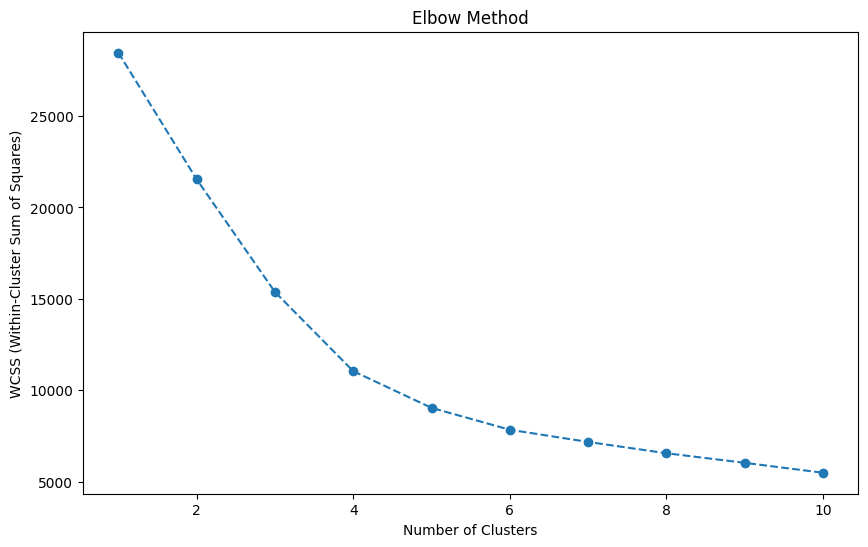

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


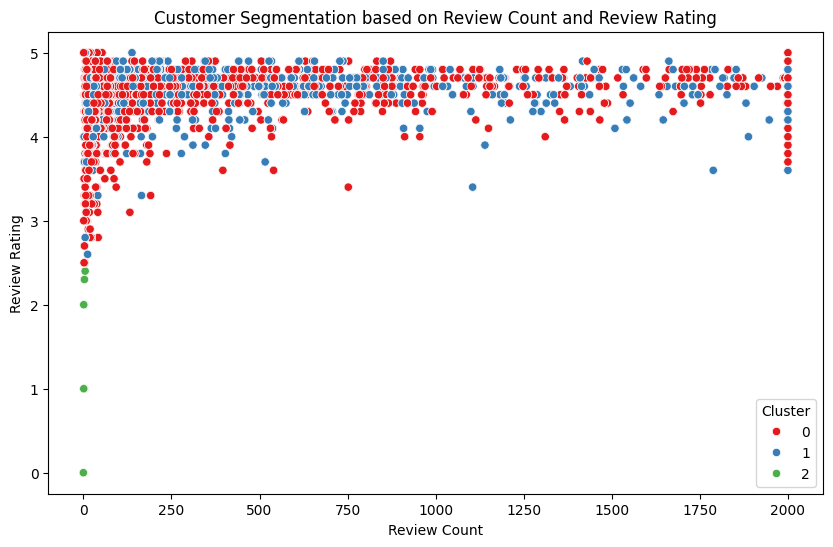

Cluster Centers:
   distance  review_count  review_rating  delivery_time
0  0.639927     -0.012685       0.319037       0.474283
1 -0.982105      0.225788       0.339431      -0.692445
2  0.004586     -0.696874      -2.797608      -0.116299

Top Cuisines by Cluster:
cluster          
0        American    898
         Italian     685
         Mexican     621
1        American    610
         Mexican     418
         Italian     402
2        American    232
         Mexican     159
         Italian      81
Name: cuisines, dtype: int64

Average Delivery Time by Cluster:
cluster
0    40.987562
1    29.174692
2    35.013423
Name: delivery_time, dtype: float64

Cluster Distribution by City:
cluster            0    1    2
searched_city                 
Anaheim           60   49    8
Astoria           11   27    9
Belmont            6   19    0
Boston           405  106   26
Brooklyn         595  608  219
Burbank          125   58   25
Cambridge        196   42   17
Charlestown      196   41  

In [ ]:

# Load cleaned and filtered data
data = pd.read_csv('/content/cleaned_doordash.csv')

# Select relevant features for clustering
features = ['distance', 'review_count', 'review_rating', 'delivery_time']

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Determine optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
optimal_num_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='review_count', y='review_rating', hue='cluster', palette='Set1')
plt.title('Customer Segmentation based on Review Count and Review Rating')
plt.xlabel('Review Count')
plt.ylabel('Review Rating')
plt.legend(title='Cluster')
plt.show()

# Output relevant text for better understanding
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=features))

# Additional relevant results
# 1. Top cuisines in each cluster
top_cuisines_by_cluster = data.groupby('cluster')['cuisines'].apply(lambda x: x.value_counts().head(3))
print("\nTop Cuisines by Cluster:")
print(top_cuisines_by_cluster)

# 2. Average delivery time by cluster
avg_delivery_time_by_cluster = data.groupby('cluster')['delivery_time'].mean()
print("\nAverage Delivery Time by Cluster:")
print(avg_delivery_time_by_cluster)

# 3. Distribution of clusters by city
cluster_distribution_by_city = data.groupby(['searched_city', 'cluster']).size().unstack(fill_value=0)
print("\nCluster Distribution by City:")
print(cluster_distribution_by_city)

# Customer Satisfaction Metrics
* Explore additional customer satisfaction metrics such as customer feedback sentiment analysis or customer retention rates to understand overall customer satisfaction levels and identify areas for improvement.
Restaurant Performance Indicators:
# Restaurant Performance Indicators
* Integrate restaurant performance indicators such as order fulfillment rates, average order value, or customer wait times to assess the operational efficiency and service quality of restaurants.
Market Trends and Seasonality:
# Market Trends and Seasonality
* Analyze market trends and seasonality patterns to uncover insights into peak delivery times, popular cuisine choices during specific seasons or holidays, and potential demand fluctuations.

In [ ]:
from pyspark.sql.functions import hour, dayofweek, col, when

df = spark.read.csv(data_path, header=True, inferSchema=True)

df = df.select('cuisines', 'delivery_time', 'review_count', 'distance')

df = df.withColumn("restaurant_type", col("cuisines"))

# 2. Group delivery times into categories
# For example: fast (<=20 mins), moderate (20-40 mins), slow (>40 mins)
df = df.withColumn("delivery_time_category", \
                   when(col("delivery_time") <= 20, "Fast") \
                   .when(col("delivery_time") <= 40, "Moderate") \
                   .otherwise("Slow"))

# 5. Extract day of the week from 'RunDate' column
# df = df.withColumn("day_of_week", dayofweek("RunDate"))

# # 6. Extract hour of the day from 'RunDate' column
# df = df.withColumn("hour_of_day", hour("RunDate"))

# 9. Group review counts into categories
# For example: low (<= 100 reviews), medium (100-500 reviews), high (> 500 reviews)
df = df.withColumn("review_count_category", \
                   when(col("review_count") <= 100, "Low") \
                   .when(col("review_count") <= 500, "Medium") \
                   .otherwise("High"))

# Display the updated DataFrame
df.show()

+----------+-------------+------------+-----------+---------------+----------------------+---------------------+
|  cuisines|delivery_time|review_count|   distance|restaurant_type|delivery_time_category|review_count_category|
+----------+-------------+------------+-----------+---------------+----------------------+---------------------+
|Vietnamese|           29|        1364|1.594482039|     Vietnamese|              Moderate|                 High|
|Vietnamese|           29|        1364|1.594482039|     Vietnamese|              Moderate|                 High|
|Vietnamese|           29|        1364|1.594482039|     Vietnamese|              Moderate|                 High|
|   Mexican|           28|        2000|0.404576503|        Mexican|              Moderate|                 High|
|   Mexican|           28|        2000|0.404576503|        Mexican|              Moderate|                 High|
|   Mexican|           28|        2000|0.404576503|        Mexican|              Moderate|      

# Predictive Modeling of Delivery Time Using **Linear Regression**

* Develop a predictive model to estimate delivery times based on the distance, geographic coordinates, and metro area density.

* This could help optimize delivery routes and improve customer service by providing more accurate delivery time estimates.

**1. Data Coding and Initial Processing.**

In [ ]:
from pyspark.sql.functions import col

# Start a Spark session
spark = SparkSession.builder.appName("DeliveryTimePrediction").getOrCreate()

# Load data
df = spark.read.csv('/content/doordash.csv', header=True, inferSchema=True)

# Select relevant columns
selected_columns = ['distance', 'delivery_time', 'searched_city', 'searched_state', 'latitude', 'longitude']
df = df.select(selected_columns)

# Drop rows with missing values
df = df.dropna()

**2. Feature Engineering**

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# Add index to DataFrames for one-hot encoding
def add_index(df, column_name):
    # Add a unique ID
    df = df.withColumn("unique_id", monotonically_increasing_id())
    # Create a distinct DataFrame for the column to encode
    distinct_df = df.select(column_name).distinct()
    distinct_df = distinct_df.withColumn("index", monotonically_increasing_id())
    # Join back on the original DataFrame to associate original rows with the index
    return df.join(distinct_df, [column_name], "left").drop(column_name).drop("unique_id")

# Apply indexing for categorical columns
df = add_index(df, 'searched_city')
df = add_index(df, 'searched_state')

# Ensure the column names are correctly aligned after transformations
df.show()

# Proceed with model training preparations
# Convert to pandas DataFrame
pandas_df = df.toPandas()


+-----------+-------------+----------+------------+-----+-----+
|   distance|delivery_time|  latitude|   longitude|index|index|
+-----------+-------------+----------+------------+-----+-----+
|1.594482039|           29|40.6754643| -73.9807822|   23|    3|
|1.594482039|           29|40.6754643| -73.9807822|   14|    3|
|1.594482039|           29|40.6754643| -73.9807822|   14|    3|
|0.404576503|           28|40.6729784| -73.9504615|   14|    3|
|0.404576503|           28|40.6729784| -73.9504615|   23|    3|
|0.404576503|           28|40.6729784| -73.9504615|   14|    3|
|0.298769641|           25|40.6745375|-73.95000743|   23|    3|
|0.298769641|           25|40.6745375|-73.95000743|   14|    3|
|0.298769641|           25|40.6745375|-73.95000743|   14|    3|
|1.394091781|           42|40.6809304| -73.9771403|   23|    3|
|1.394091781|           42|40.6809304| -73.9771403|   14|    3|
|1.394091781|           42|40.6809304| -73.9771403|   14|    3|
|1.716376366|           34|40.6685832| -

**3: Model Training with Scikit-Learn**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Ensure all columns are numeric, using errors='coerce' to handle exceptions
pandas_df = pandas_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values that result from non-numeric entries
pandas_df = pandas_df.dropna()

# Check if the DataFrame is empty after dropping NaNs
if pandas_df.empty:
    raise ValueError("DataFrame is empty after dropping rows with non-convertible values.")

# Prepare data for training
X = pandas_df.drop('delivery_time', axis=1)
y = pandas_df['delivery_time']

# Ensure 'X' is a DataFrame and 'y' is a Series
if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.Series):
    raise TypeError("X must be a DataFrame and y must be a Series.")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([39.43613231, 33.76461305, 39.24931864, ..., 41.09153888,
       32.75526219, 41.29725137])

**4. Model Evaluation**

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 77.35396298015564


**5. Displaying Predicted and Actual Delivery Times Alongside Test Features**

In [ ]:
# Convert the scaled test features back to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=[col for col in pandas_df.columns if col != 'delivery_time'])

# Reset index for concatenation
X_test_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(y_pred, columns=['Predicted Delivery Time'])

# Combine the test features, predicted delivery times, and actual delivery times
results_df = pd.concat([X_test_df, predictions_df, y_test.rename('Actual Delivery Time')], axis=1)

# Display the results DataFrame
results_df.head()


,distance,latitude,longitude,index,index,Predicted Delivery Time,Actual Delivery Time
0,0.752277,0.836241,0.817492,1.613490,1.396810,39.436132,46.0
1,-2.101326,0.716128,-0.097084,-0.437924,-0.319813,33.764613,37.0
2,0.698406,0.841039,0.815823,1.613490,1.396810,39.249319,37.0
3,0.881608,-1.797774,-1.781786,-0.291394,-1.178124,36.315924,46.0
4,-0.198451,0.836662,0.818434,1.613490,1.396810,35.279367,32.0


<ipython-input-120-95acefebc8ad>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Linear Regression Line')


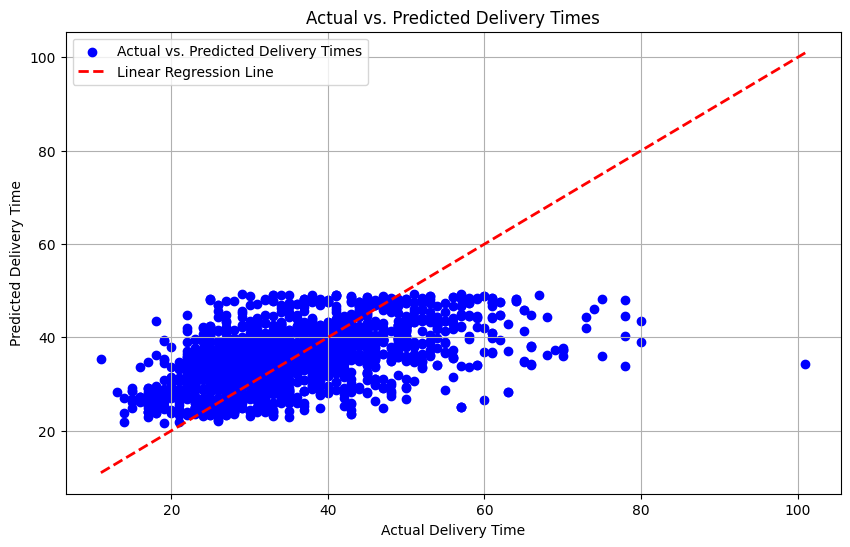

In [ ]:
# Plot actual vs. predicted delivery times
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted Delivery Times')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Linear Regression Line')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs. Predicted Delivery Times')
plt.legend()
plt.grid(True)
plt.show()

# Cuisine Recommendation System

A recommendation system that suggests cuisines or specialty items to users based on their location and preferences

* ALS (Alternating Least Squares) algorithm to generate recommendations for restaurants based on user review ratings.
* Predict the review ratings for different cuisines, specialty items, meal types, and dietary preferences in each city, leveraging the trained ALS model.

In [ ]:
from pyspark.sql.functions import explode, split, col, isnan, when, max
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import lit
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

# Initialize Spark session
spark = SparkSession.builder.appName("Cuisine Recommendation System").getOrCreate()

df = spark.read.csv(data_path, header=True, inferSchema=True)

# Convert 'review_rating' to float type to ensure compatibility with ALS model
df = df.withColumn("review_rating", df["review_rating"].cast("float"))

# Filter out rows where 'review_rating' is NaN, Null, or zero
df = df.filter(df["review_rating"].isNotNull() & (~isnan(df["review_rating"])) & (df["review_rating"] > 0))

# Exploding delimited columns into arrays and filtering out 'Miscellaneous'
def explode_columns(dataframe, columns):
    for column in columns:
        # Explode the column into multiple rows
        dataframe = dataframe.withColumn(column, explode(split(col(column), "\\|")))
        # Filter out 'Miscellaneous'
        dataframe = dataframe.filter(~col(column).contains("Miscellaneous"))
    return dataframe

# Columns to be exploded
columns_to_explode = ['cuisines', 'Specialty Items', 'Meal Types', 'Dietary Preferences']
df = explode_columns(df, columns_to_explode)

# Indexing needed for ALS algorithm
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in columns_to_explode + ["searched_city"]]

pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df).transform(df)

# Split the data into training and test sets
(train, test) = df_indexed.randomSplit([0.8, 0.2], seed=42)

# ALS model parameters
als = ALS(maxIter=5, regParam=0.01, userCol="searched_city_index", itemCol="cuisines_index", ratingCol="review_rating", coldStartStrategy="drop")

# Fit the ALS model to the training data
model = als.fit(train)

# Generate predictions on the test set
predictions = model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(metricName="rmse", labelCol="review_rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error on test data = " + str(rmse))

# Show predictions
# predictions.select('searched_city', 'cuisines', 'review_rating', 'prediction').show()

# Convert predictions to pandas dataframe and save to CSV
predictions_df = predictions.select('searched_city', 'cuisines', 'Specialty Items', 'Meal Types', 'Dietary Preferences', 'review_count', 'review_rating', 'prediction').toPandas()
predictions_df.to_csv('predictions.csv', index=False)

# Display the first 20 rows of predictions
predictions_df.head(20)



Root-mean-square error on test data = 0.21897647832106415


,searched_city,cuisines,Specialty Items,Meal Types,Dietary Preferences,review_count,review_rating,prediction
0,Manhattan Beach,Mexican,Tacos,Lunch,Vegetarian,2000,4.5,4.696221
1,Manhattan Beach,Mexican,Sandwiches,Beverages,Gluten-Free,2000,4.7,4.696221
2,Manhattan Beach,Mexican,Tacos,Beverages,Vegan,2000,4.7,4.696221
3,Burbank,Mexican,Tacos,Breakfast,Vegetarian,13,4.5,4.678928
4,Burbank,Mexican,Tacos,Lunch,Vegan,193,4.6,4.678928
5,New York,Mexican,Burgers,Breakfast,Halal,58,4.5,4.375225
6,New York,Mexican,Tacos,Desserts,Vegan,1778,4.7,4.375225
7,Boston,Mexican,Tacos,Lunch,Vegetarian,2000,4.1,4.264778
8,Glendale,Mexican,Tacos,Beverages,Vegan,991,4.8,4.636184
9,Glendale,Mexican,Tacos,Beverages,Vegetarian,991,4.8,4.636184


* **Extracts the most common dietary preferences, specialty items, meal types, and cuisines for each city and merges them with the top predicted cuisine recommendations.**

* **Utilizing top predicted cuisine recommendations alongside expected customer preferences can inform decisions on opening new restaurants, potentially increasing profitability by aligning offerings with local tastes and demand.**

In [ ]:
# Function to get top cuisine recommendation for each city
def get_top_cuisine_recommendations(predictions_df):
    # Group predictions by city and find the cuisine with the highest predicted rating for each city
    top_cuisine_recommendations = predictions_df.groupby('searched_city').apply(lambda x: x.loc[x['prediction'].idxmax()]).reset_index(drop=True)
    return top_cuisine_recommendations

# Function to get most common value for each category
def get_most_common_values(df, column):
    return df.groupby('searched_city').agg({column: lambda x: x.value_counts().index[0]}).reset_index()

# Get top cuisine recommendations for each city
top_cuisine_recommendations = get_top_cuisine_recommendations(predictions_df)

# Get most common dietary preference, specialty item, and meal type for each city
most_common_dietary_preferences = get_most_common_values(df_indexed.toPandas(), 'Dietary Preferences')
most_common_specialty_items = get_most_common_values(df_indexed.toPandas(), 'Specialty Items')
most_common_meal_types = get_most_common_values(df_indexed.toPandas(), 'Meal Types')
most_common_cuisine_types = get_most_common_values(df_indexed.toPandas(), 'cuisines')


# Merge recommendations with most common values
recommendations = pd.merge(top_cuisine_recommendations, most_common_dietary_preferences, on='searched_city')
recommendations = pd.merge(recommendations, most_common_specialty_items, on='searched_city')
recommendations = pd.merge(recommendations, most_common_meal_types, on='searched_city')
recommendations = pd.merge(recommendations, most_common_cuisine_types, on='searched_city')

# Rename columns for clarity
# recommendations.columns = ['City', 'Cuisine', 'Review Count', 'Review Rating', 'Predicted Rating', 'Dietary Preference', 'Specialty Item', 'Meal Type']

recommendations.rename(columns={'cuisines_x': 'Predicted Cuisine',
                                'Specialty Items_x': 'Predicted Specialty Item',
                                'Meal Types_x': 'Predicted Meal Type',
                                'Dietary Preferences_x': 'Predicted Dietary Preference',
                                'Dietary Preferences_y': 'Expected Dietary Preference',
                                'Specialty Items_y': 'Expected Specialty Item',
                                'Meal Types_y': 'Expected Meal Type',
                                'cuisines_y': 'Expected Cuisine'}, inplace=True)

# Drop unnecessary columns
recommendations.drop(columns=['review_rating', 'prediction', 'review_count'], inplace=True)

# Reorder columns as predicted first, followed by actual values
column_order = ['searched_city',
                'Predicted Cuisine', 'Expected Cuisine', 'Predicted Specialty Item', 'Expected Specialty Item', 'Predicted Meal Type', 'Expected Meal Type',
                'Predicted Dietary Preference', 'Expected Dietary Preference']

recommendations = recommendations[column_order]
recommendations.to_csv('recommendations.csv', index=False)
# Display the first 20 rows of recommendations
recommendations.head(20)


,searched_city,Predicted Cuisine,Expected Cuisine,Predicted Specialty Item,Expected Specialty Item,Predicted Meal Type,Expected Meal Type,Predicted Dietary Preference,Expected Dietary Preference
0,Anaheim,Mediterranean,American,Sandwiches,Tacos,Lunch,Lunch,Vegetarian,Vegan
1,Boston,French,American,Salad,Sandwiches,Beverages,Lunch,Gluten-Free,Gluten-Free
2,Brooklyn,Seafood,American,Indian,Burgers,Appetizers,Dinner,Vegetarian,Vegetarian
3,Burbank,Mexican,Mexican,Tacos,Tacos,Breakfast,Beverages,Vegetarian,Vegan
4,Cambridge,American,Seafood,Burgers,Salad,Breakfast,Beverages,Vegetarian,Gluten-Free
5,Charlestown,American,Seafood,Tacos,Salad,Lunch,Beverages,Gluten-Free,Gluten-Free
6,Chicago,Italian,American,Indian,Sandwiches,Beverages,Appetizers,Gluten-Free,Vegan
7,Dorchester,French,American,Salad,Sandwiches,Breakfast,Lunch,Gluten-Free,Gluten-Free
8,Glendale,Vietnamese,Mexican,Ramen,Tacos,Beverages,Beverages,Vegan,Vegan
9,Glenview,American,American,Tacos,Tacos,Lunch,Lunch,Gluten-Free,Vegan


<ipython-input-109-ed427c40b0e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=recommendations, x='Predicted Cuisine', order=recommendations['Predicted Cuisine'].value_counts().index[:10], palette='viridis')


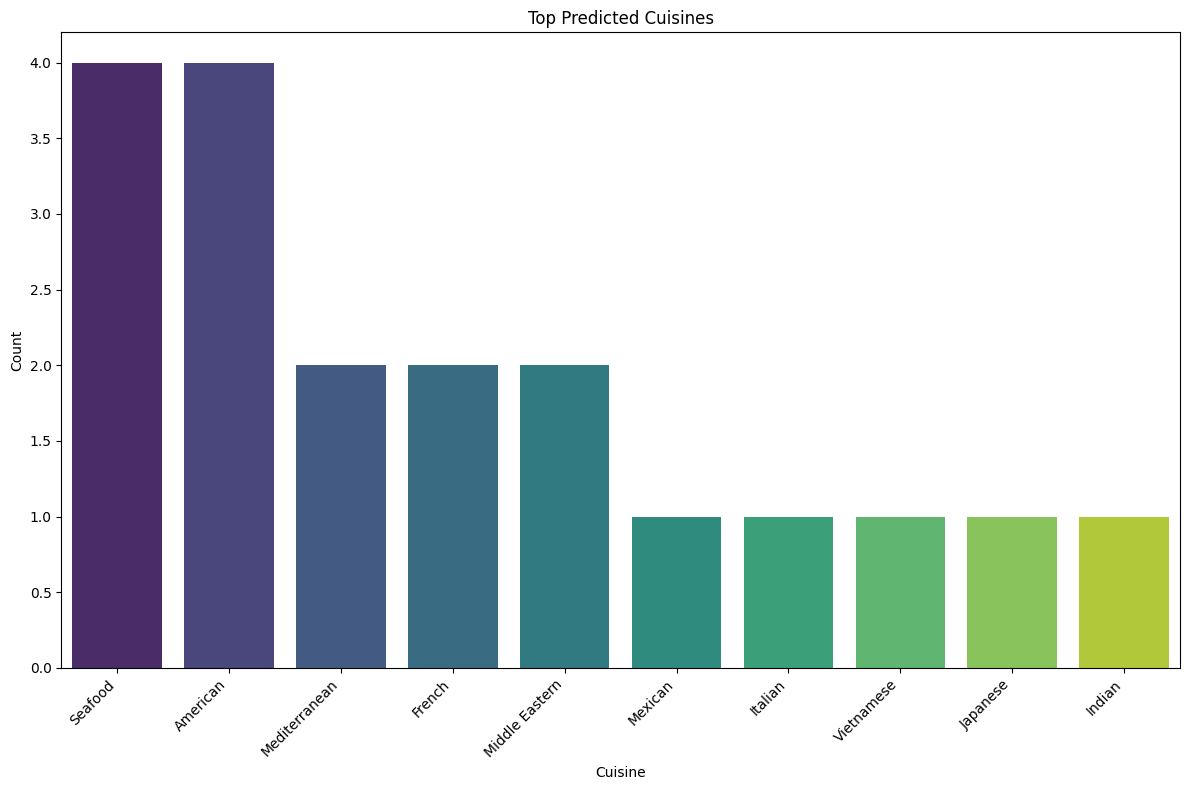

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top predicted and expected cuisines
plt.figure(figsize=(12, 8))
sns.countplot(data=recommendations, x='Predicted Cuisine', order=recommendations['Predicted Cuisine'].value_counts().index[:10], palette='viridis')
plt.title('Top Predicted Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
